In [1]:
import tensorflow as tf
config_proto = tf.compat.v1.ConfigProto()
config_proto.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config_proto)
tf.compat.v1.keras.backend.set_session(session)


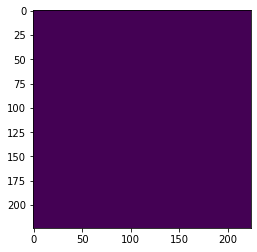

In [7]:
IMAGE_PATH = r"F:\Lab\nfs\notredame\data\04252d707.png"
import tf_explain.core as tfe
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load pretrained model or your own
model = tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.layers[-1].activation = None
model.add(tf.keras.layers.Activation('sigmoid'))

# Load a sample image (or multiple ones)
img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(224, 224))

img = tf.keras.preprocessing.image.img_to_array(img, dtype=np.uint8)
plt.imshow(img)

# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
data = ([img, img], None)

# Start explainer
explainer = tfe.smoothgrad.SmoothGrad()
grid = explainer.explain(data, model, class_index=0)  # 281 is the tabby cat index in ImageNet

plt.imshow(grid)

In [3]:

import innvestigate

analyzer = innvestigate.create_analyzer("integrated_gradients", model)

a = analyzer.analyze([img])

# Aggregate along color channels and normalize to [-1, 1]
a = a.sum(axis=np.argmax(np.asarray(a.shape) == 3))
a /= np.max(np.abs(a))
# Plot
plt.imshow(a[0], cmap="seismic", clim=(-1, 1))

Using TensorFlow backend.


AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [6]:
import tensorflow as tf
config_proto = tf.compat.v1.ConfigProto()
config_proto.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config_proto)
tf.compat.v1.keras.backend.set_session(session)


model = tf.keras.applications.efficientnet.EfficientNetB0()


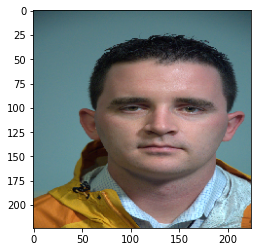

In [7]:
IMAGE_PATH = r"F:\Lab\nfs\notredame\data\04252d707.png"
import tf_explain.core as tfe
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load pretrained model or your own
model = tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Load a sample image (or multiple ones)
img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(224, 224))

img = tf.keras.preprocessing.image.img_to_array(img, dtype=np.uint8)
plt.imshow(img)

# # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# data = ([img], None)

# # Start explainer
# explainer = tfe.integrated_gradients.IntegratedGradients()
# grid = explainer.explain(data, model, class_index=0)  # 281 is the tabby cat index in ImageNet

# plt.imshow(grid)

In [17]:
def model_modifier(model):
    base_model = model.layers[0]
    layers = model.layers[1:]

    x = base_model.output
    for layer in layers:
        x = layer(x)
    
    outputs = x
    unified_model = tf.keras.Model(base_model.inputs, outputs)
    return unified_model

In [18]:
model = model_modifier(model)
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

TypeError: Invalid shape (1, 224, 224, 3) for image data

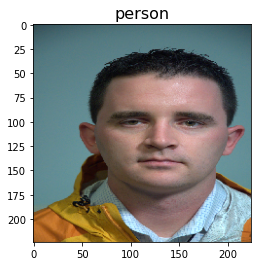

In [21]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore
from tf_keras_vis.scorecam import Scorecam
from tf_keras_vis.utils import num_of_gpus

# Create ScoreCAM object
scorecam = Scorecam(model)

images = [img, ]
# Generate heatmap with ScoreCAM
cam = scorecam(CategoricalScore([0]), images, penultimate_layer=-1)

## Since v0.6.0, calling `normalize()` is NOT necessary.
# cam = normalize(cam)

# Render
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
for i, title in enumerate(["person"]):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax.set_title(title, fontsize=16)
    ax.imshow(images[i])
    ax.imshow(heatmap, cmap='jet', alpha=0.5)
    ax.axis('off')
plt.tight_layout()
plt.show()

In [6]:
from glob import glob
import os
for f in glob(r"F:\Lab\nfs\base\checkpoints\open_world\*"):
    # print(f)
    new_fn = f.split('.')[0] + '_F50M50.' + '.'.join(f.split('.')[1:])
    os.rename(f, new_fn)

In [14]:
import plotly.figure_factory as ff

z = [[123, 5], [6, 149]]
labels = ["Female", "Male"]
font_colors = ['black', 'white']
fig = ff.create_annotated_heatmap(z, labels, labels, showscale=True, colorscale='Viridis', font_colors=font_colors, reversescale=True)
fig.update_layout(
    autosize=False,
    width=500,
    height=500,)
fig.show()

with open('test.json', 'w') as f:
    f.write(fig.to_json())


In [9]:
import plotly

fig = plotly.io.read_json(r"F:\Lab\nfs\base\InceptionResNetV2_UFPR_aligned_aug_gender_finetuned_F50M50_0_cm.json")
fig.show()

In [9]:
import cv2
import numpy as np
from glob import glob
models = ["EfficientNetB4", "DenseNet121", "MobileNetV2", "InceptionV3",
            "InceptionResNetV2", "ResNet50", "Xception", "EfficientNetB0"]

cls_ = ["pos", "neg"]
methods = ["grad_cam", "guided_gradcam", "integrated_gradients", "gradients_inputs", "vanilla_gradients", "occlusion_sensitivity"]
types = ["tp", "tn", "fp", "fn"]
for model in models:
    for c in cls_:
        for method in methods:
            for tp in types:
                wc = r"F:\Lab\nfs\nsf-ocular-bias\content\updates\notredame-results\assets\imgs\\" + model + "_Notredame_band_aug_gender_finetuned_F50M50_" + method + "_" + c + "_" + tp + "*"
                final_img = np.zeros((177, 490, 3))

                for f in glob(wc):
                    img = cv2.imread(f).astype(np.float32)
                    img /= 255
                    final_img += img

                if (len(glob(wc))) == 0:
                    print(wc)
                final_img /= len(glob(wc))

                final_img = (final_img * 255).astype(np.uint8)

                fn = r"F:\Lab\nfs\nsf-ocular-bias\content\updates\notredame-results\assets\imgs\\" + model + "_Notredame_band_aug_gender_finetuned_F50M50_" + method + "_" + c + "_" + tp + "_avg.png"
                cv2.imwrite(fn, final_img)

def s(img):
    brightness = 0

    contrast = 50
    img = np.int16(img)
    img = img * (contrast/127+1) - contrast + brightness
    img = np.clip(img, 0, 255)
    img = np.uint8(img)
    return img
